In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import os

#### The formal code

In [204]:
# test the shape file
# test the shapefile
# try the new code of plotting
import seaborn as sns
import shapefile

# load the shape file of the Beijing Road
shapefile_path = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\tl_2016_26_cousub\tl_2016_26_cousub.shp'
file = shapefile.Reader(shapefile_path)

# bound of michigan
lat_min = 42.222296
lng_min = -83.808132
lat_max = 42.325966
lng_max = -83.673738

In [3]:
l = file.records()
lat = list(map(lambda x: np.float(x), [x[-2] for x in l]))
lng = list(map(lambda x: np.float(x), [x[-1] for x in l]))

In [4]:
for shapeRecord in file.shapeRecords():
    record = shapeRecord.shape.points
    break
    

In [ ]:
def points_in_region()

In [119]:
os.listdir(r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\michigan_data')

['1107csv.csv',
 '1114.csv',
 '1120k.csv',
 '1133.csv',
 '1137.csv',
 '1556k.csv',
 '1569.csv',
 '1573k.csv',
 '1576.csv']

In [192]:
dirs = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\michigan_data'
files = os.listdir(dirs)
for file in files:
    if '(' in file:
        print(file)
        os.remove(dirs + '//' + file)

2494(1).csv
2501(1).csv
2505(1).csv
2507(1).csv
2512(1).csv
2527k(1).csv
2537(1).csv
2555k(1).csv
2561(1).csv
2565k(1).csv
2577k(1).csv
2600k(1).csv
2608(1).csv
2620(1).csv
2642(1).csv
2643(1).csv
2644(1).csv
2648(1).csv
2648(2).csv
2660k(1).csv
2663(1).csv
2663(2).csv
2670k(1).csv
2671(1).csv
2672(1).csv
2683(1).csv
2710k(1).csv
2713k(1).csv
2715(1).csv
2724k(1).csv
2725k(1).csv
2726k(1).csv
2727k(1).csv
2735k(1).csv
2738(1).csv
2755k(1).csv
2755k(2).csv
2760k(1).csv
2762(1).csv
2762(2).csv
2767(1).csv
2767(2).csv
2770k(1).csv
2778(1).csv
2779k(1).csv
2780(1).csv
2793(1).csv
2799(1).csv
2817k(1).csv
2822(1).csv
2831(1).csv
2833(1).csv
2860(1).csv
2863(1).csv
2872k(1).csv
2876(1).csv
2888(1).csv
2890(1).csv
2890(2).csv
2891k(1).csv
2894(1).csv
2898k(1).csv
2899(1).csv
2902(1).csv
2902(2).csv
2938k(1).csv
2938k(2).csv
2945(1).csv
2946(1).csv
2968k(1).csv
2977(1).csv
2980k(1).csv
2998k(1).csv
3001k(1).csv
3002(1).csv
3012(1).csv
3021k(1).csv
3031(1).csv
3042k(1).csv
3044(1).csv
3050(1).c

In [199]:
init_time = pd.to_datetime('2013-11-13 08:00:00')
end_time = pd.to_datetime('2013-11-13 10:59:59')

In [193]:
# process the data
def data_clean(ori_path, dst_path, init_time = init_time, end_time = end_time, 
               lat_max = lat_max, lat_min = lat_min, lng_max = lng_max, lng_min = lng_min):
    ori_list = os.listdir(ori_path)
    des_list = os.listdir(dst_path)
    todo_list = [x for x in ori_list if x not in des_list]
    for ori_file in todo_list:
        print('processing {}'.format(ori_file))
        df = pd.read_csv(ori_path + '\\' + ori_file, header = None)
        df.columns = ['id', 'trip_id', 'current_lat', 'current_lng', 'v_vel', 'current_time']
        if df.iloc[0,0] == 'Device':
            df = df.iloc[1:,:]
        df['id'] = df['id'].astype(int)
        df['trip_id'] = df['trip_id'].astype(int)
        df['current_time'] = pd.to_datetime(df['current_time'])
        df['current_lat'] = df['current_lat'].astype(float)
        df['current_lng'] = df['current_lng'].astype(float)
        mask_latlng = (df['current_lat']>=lat_min) & (df['current_lat']<= lat_max) & (df['current_lng']>=lng_min) & (df['current_lng'] <= lng_max)
        mask_datetime = (df['current_time']>=init_time) & (df['current_time']<=end_time)
        df = df.loc[mask_latlng & mask_datetime,:]
        df.to_csv(dst_path + '\\' + ori_file, index = False)

data_clean(r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\michigan_data',
          r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\michigan_data_8_11')

processing 2494.csv


C:\Users\Zhaobin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2856: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


processing 2497.csv
processing 2501.csv
processing 2505.csv
processing 2507.csv
processing 2512.csv
processing 2515.csv
processing 2523k.csv
processing 2527k.csv
processing 2537.csv
processing 2555k.csv
processing 2561.csv
processing 2565k.csv
processing 2577k.csv
processing 2581.csv
processing 2583k.csv
processing 2584.csv
processing 2600k.csv
processing 2608.csv
processing 2620.csv
processing 2642.csv
processing 2643.csv
processing 2644.csv
processing 2648.csv
processing 2660k.csv
processing 2663.csv
processing 2670k.csv
processing 2671.csv
processing 2672.csv
processing 2683.csv
processing 2685.csv
processing 2710k.csv
processing 2713k.csv
processing 2715.csv
processing 2724k.csv
processing 2725k.csv
processing 2726k.csv
processing 2727k.csv
processing 2735k.csv
processing 2737k.csv
processing 2738.csv
processing 2755k.csv
processing 2760k.csv
processing 2762.csv
processing 2767.csv
processing 2770k.csv
processing 2778.csv
processing 2779k.csv
processing 2780.csv
processing 2793.csv

In [209]:
len(set(df['id'].tolist()))

73

In [194]:
# read and assenmbel
def read_path(dst_path):
    files = os.listdir(dst_path)
    dfsum = pd.DataFrame([])
    for file in files:
        print('file = {}'.format(file))
        df = pd.read_csv(dst_path + '\\' + file)
        dfsum = pd.concat([dfsum, df])
    return dfsum

df = read_path(r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\michigan_data_8_11')    

file = 1107csv.csv
file = 1114.csv
file = 1120k.csv
file = 1133.csv
file = 1137.csv
file = 1556k.csv
file = 1569.csv
file = 1573k.csv
file = 1576.csv
file = 1582.csv
file = 1589k.csv
file = 1592k.csv
file = 1593.csv
file = 1596.csv
file = 1598.csv
file = 2024.csv
file = 2025.csv
file = 2047k.csv
file = 2056k.csv
file = 2057.csv
file = 2073.csv
file = 2079.csv
file = 2085k.csv
file = 2088.csv
file = 2118.csv
file = 2139.csv
file = 2142.csv
file = 2149.csv
file = 2151k.csv
file = 2152.csv
file = 2153k.csv
file = 2160k.csv
file = 2162.csv
file = 2239.csv
file = 2357.csv
file = 2436k.csv
file = 2437.csv
file = 2442k.csv
file = 2456.csv
file = 2480k.csv
file = 2490k.csv
file = 2494.csv
file = 2497.csv
file = 2501.csv
file = 2505.csv
file = 2507.csv
file = 2512.csv
file = 2515.csv
file = 2523k.csv
file = 2527k.csv
file = 2537.csv
file = 2555k.csv
file = 2561.csv
file = 2565k.csv
file = 2577k.csv
file = 2581.csv
file = 2583k.csv
file = 2584.csv
file = 2600k.csv
file = 2608.csv
file = 2620.csv

In [207]:
sample_freq = 10

df['current_time'] = pd.to_datetime(df['current_time'])
df['t_diff'] = df['current_time'].apply(lambda x: (x-init_time).total_seconds())

df['int_t_diff'] = df['t_diff'].apply(lambda x : int(x/sample_freq))
df['current_lat'] = df['current_lat'].astype(float)
df['current_lng'] = df['current_lng'].astype(float)
# average the lat and lng at the same time
grouped = df.groupby(['id','int_t_diff'])
gdf = pd.DataFrame(grouped['current_lat'].sum() / grouped['current_lat'].count())
gdf.columns = ['ave_lat']
gdf['ave_lng'] = grouped['current_lng'].sum() / grouped['current_lng'].count()
gdf = gdf.reset_index()
l_time = list(sorted(set(df['int_t_diff'].tolist())))

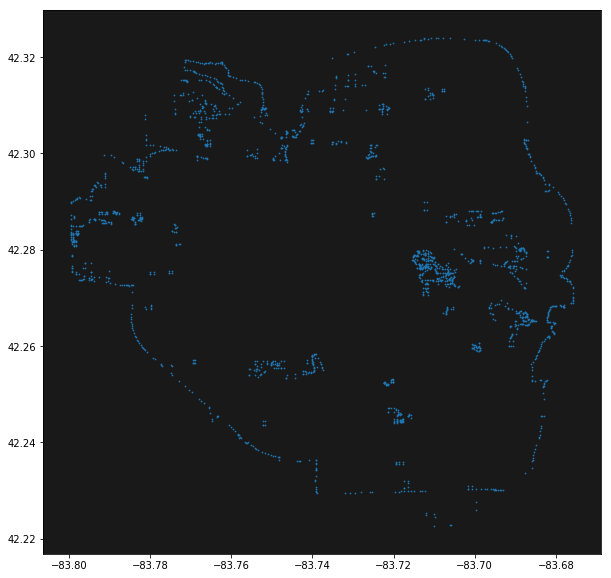

In [74]:
import matplotlib.gridspec
import pandas as pd
import matplotlib.pyplot as plt



def state2color(x):
    if x == 9999:
        return  'yellow'#'#E6E6E6'
    else:
        return   '#6666ff'          #'#009a00'


# plot the shapefile
fig = plt.figure(frameon=False) 
fig.set_size_inches(10,10)
#fig.patch.set_facecolor('black')
#ax = plt.Axes(fig, [0., 0., 1., 1.])
#ax.set_axis_off()
#ax.set_facecolor((1,0,0))
#gs1 = matplotlib.gridspec.GridSpec(1, 1)
#gs1.update(wspace=0)
ax1=plt.subplot(1,1,1,facecolor='#191919')
#ax1.set_facecolor()

def delete_the_abormal_lat_lng(lat, lng, gap_lat, gap_lng):
    dif_lat = np.diff(lat); dif_lng = np.diff(lng)
    list_idxs = []
    idxs = [0]
    for i in range(len(lat)-1):
        if (abs(lat[i] - lat[i+1])<=gap_lat) & (abs(lng[i] - lng[i+1])<=gap_lng):
            idxs.append(i+1)
        else:
            list_idxs.append(idxs)
            idxs = [i+1]
    list_idxs.append(idxs)
    return list_idxs
for shpR in file.shapeRecords():
    lat = [x[1] for x in shpR.shape.points]
    lng = [x[0] for x in shpR.shape.points]
    if (max(lat)<=lat_max) & (min(lat)>=lat_min) & (max(lng)<=lng_max) & (min(lng) >= lng_min):
        ax1.scatter(lng, lat,s = 0.5)
        #list_idxs = delete_the_abormal_lat_lng(lat, lng, 0.001, 0.001)
        #for idxs in list_idxs:
            #if idxs:
                #ax1.([lng[i] for i in filtered],[lat[i] for i in filtered])


In [112]:
df

,id,trip_id,current_lat,current_lng,v_vel,current_time,t_diff,int_t_diff
137896,1107,6222702,42.24533,-83.67385,19.64,2013-11-27 08:52:15,6735.0,673
137897,1107,6222702,42.24533,-83.67409,19.84,2013-11-27 08:52:16,6736.0,673
137898,1107,6222702,42.24535,-83.67432,19.38,2013-11-27 08:52:17,6737.0,673
137899,1107,6222702,42.24536,-83.67455,18.88,2013-11-27 08:52:18,6738.0,673
137900,1107,6222702,42.24537,-83.67477,18.36,2013-11-27 08:52:19,6739.0,673
137901,1107,6222702,42.24538,-83.67500,18.40,2013-11-27 08:52:20,6740.0,674
137902,1107,6222702,42.24539,-83.67522,18.56,2013-11-27 08:52:21,6741.0,674
137903,1107,6222702,42.24540,-83.67545,18.72,2013-11-27 08:52:22,6742.0,674
137904,1107,6222702,42.24540,-83.67567,18.98,2013-11-27 08:52:23,6743.0,674
137905,1107,6222702,42.24541,-83.67590,19.14,2013-11-27 08:52:24,6744.0,674


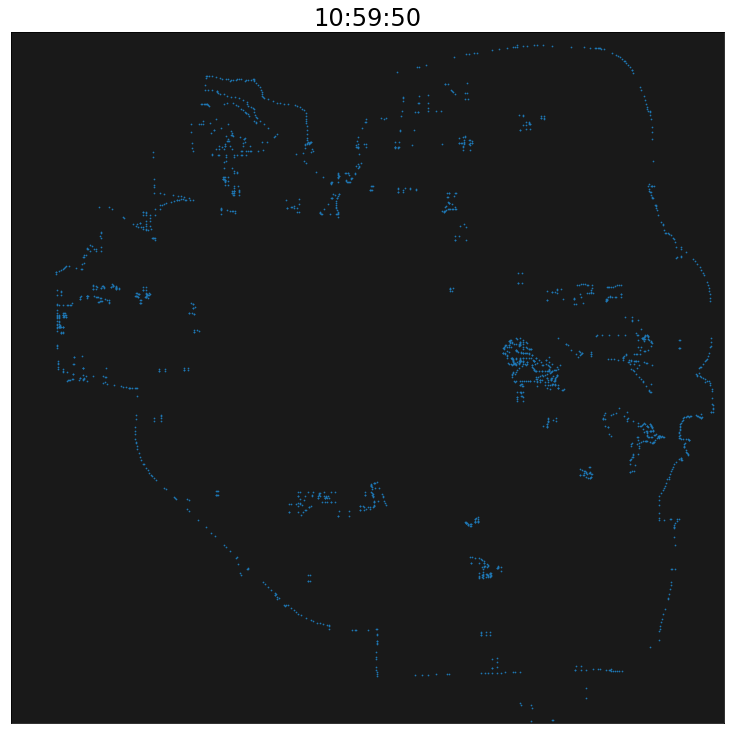

In [208]:
import matplotlib.gridspec
import pandas as pd
import matplotlib.pyplot as plt



def state2color(x):
    if x == 9999:
        return  'yellow'#'#E6E6E6'
    else:
        return   '#6666ff'          #'#009a00'


# plot the shapefile
fig = plt.figure(frameon=False) 
fig.set_size_inches(10,10)
#fig.patch.set_facecolor('black')
#ax = plt.Axes(fig, [0., 0., 1., 1.])
#ax.set_axis_off()
#ax.set_facecolor((1,0,0))
#gs1 = matplotlib.gridspec.GridSpec(1, 1)
#gs1.update(wspace=0)
ax1=plt.subplot(1,1,1,facecolor='#191919')
#ax1.set_facecolor()
for shpR in file.shapeRecords():
    lat = [x[1] for x in shpR.shape.points]
    lng = [x[0] for x in shpR.shape.points]
    if (max(lat)<=lat_max) & (min(lat)>=lat_min) & (max(lng)<=lng_max) & (min(lng) >= lng_min):
        ax1.scatter(lng,lat,s = 0.5)
    else:
        pass


color_ept = 'yellow'
color_ocp = '#6666ff'



for idx in range(len(l_time)):
    subdf = gdf[gdf['int_t_diff'] == l_time[idx] ]
    # ---------------------------------------------
    #         # we need to plot the two color with different size #
    # the color
    # state_list = subdf['state'].tolist()
    # color_list = list(map(state2color,state_list))
    #--------------------------------------------------

    p1 = ax1.scatter(subdf['ave_lng'], subdf['ave_lat'], 20,facecolors=color_ept, edgecolors=color_ept)

    plt.xlim(lng_min, lng_max)
    plt.ylim(lat_min, lat_max)
    plt.xticks([]); plt.yticks([])

    # ad the current time
    currentTime = init_time + pd.Timedelta(seconds=l_time[idx] * sample_freq)
    currentTimeStr = str(currentTime.hour).zfill(2) + ':' + str(currentTime.minute).zfill(2) + ':' + str(currentTime.second).zfill(2)
    plt.title(currentTimeStr, fontsize = 24)
    plt.tight_layout(pad=0, w_pad=0, h_pad=1.0)
    plt.savefig(r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\michigan\1113_8to11\\{}.png'.format(idx))

    p1.remove()

In [25]:
idx

198819

#### make video

In [ ]:
# trail 1
import cv2

def getFrame(video, svPath):
    cap = cv2.VideoCapture(videoPath)
    numFrame = 0
    while True:
        if cap.grab():
            flag, frame = cap.retrieve()
            if not flag:
                continue
            else:
                numFrame += 1
                newPath = svPath + str(numFrame) + ".png"
                cv2.imencode('.png', frame)[1].tofile(newPath)
        
        if cv2.waitKey(10) == 27:
            print('break at {}'.format(numFrame))
            break

            
savePicturePath = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\final_1_shapebase\\'
videoPath = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\video\\'
getFrame(videoPath, savePicturePath)
                


In [9]:
# trail two
import imageio

imgPath = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\final_1_shapebase_donwsize\\'
filenames = []
time_range = 1080
for i in range(0, time_range):
    filenames.append( imgPath + str(i) + '.jpg' )

images = []
n = 0
for filename in filenames:
    n = n + 1
    if n%10 == 0:
        print(n)
    images.append(imageio.imread(filename))
imageio.mimsave('./downsizeManul.gif', images, duration = 0.015)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080


In [6]:
# resize the image
import cv2
oldImgPath = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\final_1_shapebase\\'
newImgPath = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\final_1_shapebase_donwsize\\'
cropSize = (480,480)
timeRange = 1080

n = 0
for i in range(timeRange):
    n = n + 1
    if n%10 == 0:
        print(n)
    imgName = oldImgPath + str(i) + '.png'
    img = cv2.imread(imgName)
    img_new = cv2.resize(img, cropSize, interpolation = cv2.INTER_CUBIC)
    cv2.imwrite( newImgPath + str(i) + ".jpg", img_new)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080


In [12]:
# delete file
import os
imgPath = r'C:\Users\Zhaobin\Desktop\Didi\Git\visualization\time series\final_1_shapebase_even\\'
for idx in range(0,1080,2):
    os.remove(imgPath + str(idx) + '.png')
    